In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay


***Load CIFAR-10 dataset***

In [2]:
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.cifar10.load_data()

In [3]:
xtrain.shape

(50000, 32, 32, 3)

In [4]:
xtest.shape

(10000, 32, 32, 3)

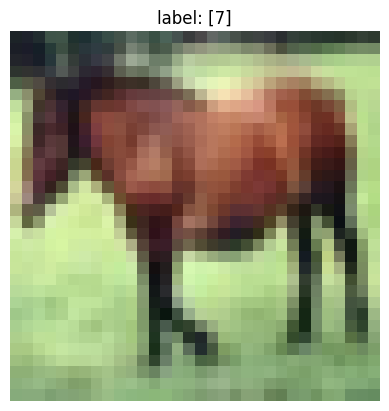

In [5]:
plt.imshow(xtrain[7])
plt.title(f"label: {ytrain[7]}")
plt.axis('off')
plt.show()

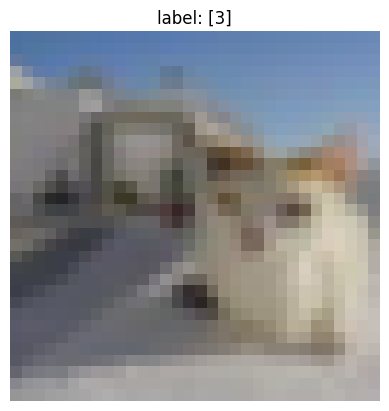

In [6]:
plt.imshow(xtrain[80], cmap='gray')
plt.title(f"label: {ytrain[80]}")
plt.axis('off')
plt.show()

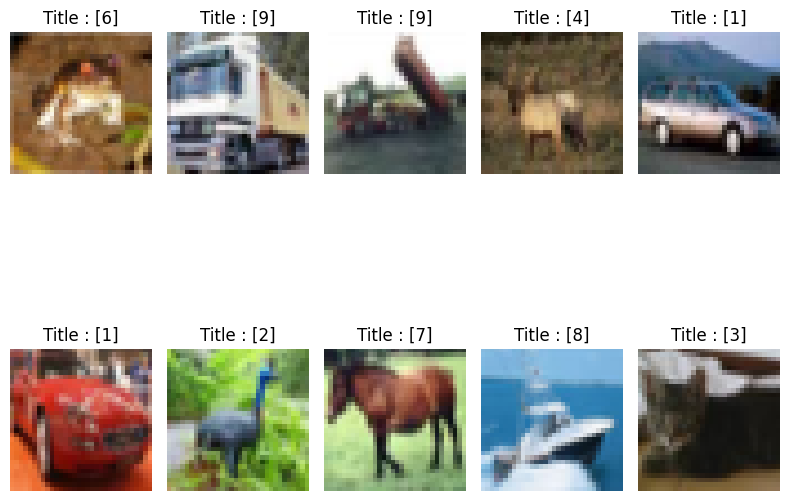

In [7]:
plt.figure(figsize=(8,8))

for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(xtrain[i])
    plt.title(f"Title : {ytrain[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

***Normalization pixel values to the range [0,1]***

In [8]:
xtrain, xtest = xtrain / 255.0 , xtest/255.0

***Convert labels to one-dimentional arrays***

In [9]:
ytrain = ytrain.flatten()
ytest = ytest.flatten()

***create a model***

In [10]:
cnn_model = models.Sequential()

***First Convolutional Block***

In [11]:
cnn_model.add(layers.Conv2D(32,(3,3),
                           activation = 'relu',
                           input_shape = (32,32,3)))

cnn_model.add(layers.BatchNormalization()) 
cnn_model.add(layers.MaxPooling2D((2,2)))
# #This layer normalizes the activations of the previous layer, cnn_model.add(layers.BatchNormalization())
# ensuring they have zero mean and unit variance. 
# It helps speed up training and reduces the risk of overfitting.

***Second Convolutional Block***

In [12]:
cnn_model.add(layers.Conv2D(64,(3,3),
                           activation = 'relu'))

cnn_model.add(layers.BatchNormalization()) 
cnn_model.add(layers.MaxPooling2D((2,2)))

***Third Convolutional Block***

In [13]:
cnn_model.add(layers.Conv2D(128,(3,3),
                           activation = 'relu'))

cnn_model.add(layers.BatchNormalization()) 

***Fully Conected layer***

In [14]:
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(128, activation= 'relu'))
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Dense(10,activation = 'softmax'))

In [15]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                                
                                                        

***Compile the model***

In [16]:
cnn_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [17]:
history = cnn_model.fit(xtrain, ytrain,
                       epochs=10,
                       batch_size=64,
                       validation_split=0.2,
                       verbose=2)

Epoch 1/10
625/625 - 81s - loss: 1.6489 - accuracy: 0.4503 - val_loss: 2.0420 - val_accuracy: 0.3641 - 81s/epoch - 130ms/step
Epoch 2/10
625/625 - 75s - loss: 1.1609 - accuracy: 0.5925 - val_loss: 1.3838 - val_accuracy: 0.5343 - 75s/epoch - 119ms/step
Epoch 3/10
625/625 - 75s - loss: 0.9955 - accuracy: 0.6511 - val_loss: 1.1189 - val_accuracy: 0.6097 - 75s/epoch - 121ms/step
Epoch 4/10
625/625 - 76s - loss: 0.8885 - accuracy: 0.6880 - val_loss: 1.1378 - val_accuracy: 0.6142 - 76s/epoch - 121ms/step
Epoch 5/10
625/625 - 85s - loss: 0.7996 - accuracy: 0.7192 - val_loss: 1.0763 - val_accuracy: 0.6472 - 85s/epoch - 135ms/step
Epoch 6/10
625/625 - 70s - loss: 0.7369 - accuracy: 0.7416 - val_loss: 1.0555 - val_accuracy: 0.6313 - 70s/epoch - 112ms/step
Epoch 7/10
625/625 - 70s - loss: 0.6604 - accuracy: 0.7671 - val_loss: 0.8834 - val_accuracy: 0.7139 - 70s/epoch - 112ms/step
Epoch 8/10
625/625 - 70s - loss: 0.6075 - accuracy: 0.7868 - val_loss: 1.2202 - val_accuracy: 0.6468 - 70s/epoch - 112

***Evalute on test data***

In [19]:
test_loss, test_accuracy = cnn_model.evaluate(xtest, ytest, verbose=2)
print(f"Test accuaracy: {test_accuracy:0.2f}")

313/313 - 4s - loss: 2.1982 - accuracy: 0.5160 - 4s/epoch - 14ms/step
Test accuaracy: 0.52


In [20]:
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

1/1 [==============================] - 0s 97ms/step


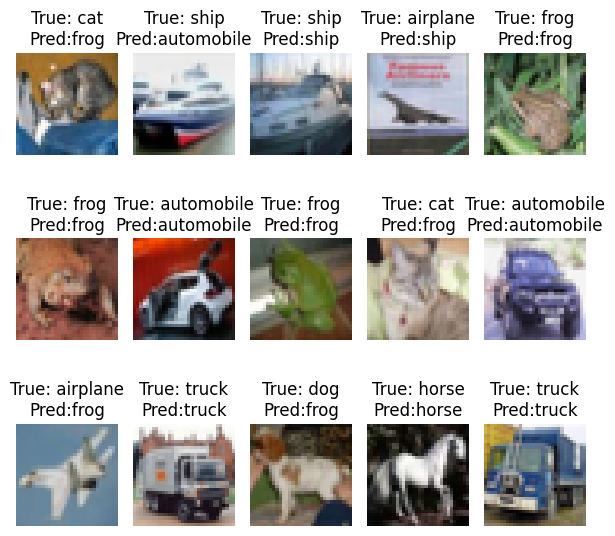

In [23]:
sample_image = xtest[:15]
sample_label = ytest[:15]
predictions = np.argmax(cnn_model.predict(sample_image), axis=1)

plt.figure(figsize=(6,6))
for i in range(15):
    plt.subplot(3,5, i+1)
    plt.imshow(sample_image[i])
    plt.title(f"True: {class_names[sample_label[i]]}\nPred:{class_names[predictions[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [30]:
y_pred = cnn_model.predict(xtest)
y_pred

313/313 [==============================] - 5s 16ms/step


array([[3.0900661e-05, 2.9542981e-04, 5.4616405e-04, ..., 1.1499370e-05,
        3.8854114e-04, 5.1949180e-05],
       [1.2674802e-06, 9.6455824e-01, 2.2035366e-08, ..., 1.2762327e-10,
        3.5438005e-02, 8.7738283e-07],
       [6.8038050e-04, 2.9860200e-02, 1.8443634e-05, ..., 3.3825887e-09,
        9.6943921e-01, 1.1828000e-06],
       ...,
       [4.6804667e-09, 4.8891502e-10, 6.7208265e-03, ..., 6.6226894e-06,
        3.0116784e-08, 6.2751056e-08],
       [5.8044386e-03, 6.3966429e-01, 2.9237360e-02, ..., 8.9584669e-04,
        6.7983381e-04, 4.9024116e-04],
       [5.6754385e-07, 2.6804378e-07, 1.2469505e-03, ..., 2.4835445e-01,
        9.1938773e-10, 6.2690759e-08]], dtype=float32)

In [31]:
y_pred_classes = np.argmax(y_pred, axis=1) #convert probabilities to class Labels
y_pred_classes

array([6, 1, 8, ..., 5, 1, 6], dtype=int64)

In [32]:
cm = confusion_matrix(ytest, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[425  18 279  13  29   3 158   4  51  20]
 [  6 714  20   4   3   2 165   6  14  66]
 [ 22   6 644  29  31  19 238   6   2   3]
 [  4   2 170 238  49  48 463  11  12   3]
 [  9   2 175  12 337   5 444  12   3   1]
 [  5   0 163 155  33 246 365  17  13   3]
 [  1   0  28   5   6   1 956   0   2   1]
 [  6   2 141  32 117  23 208 460   1  10]
 [ 33  21 121  30  26   0 225   1 535   8]
 [ 19  81  41  22  10   2 194   5  21 605]]


<Figure size 1200x800 with 0 Axes>

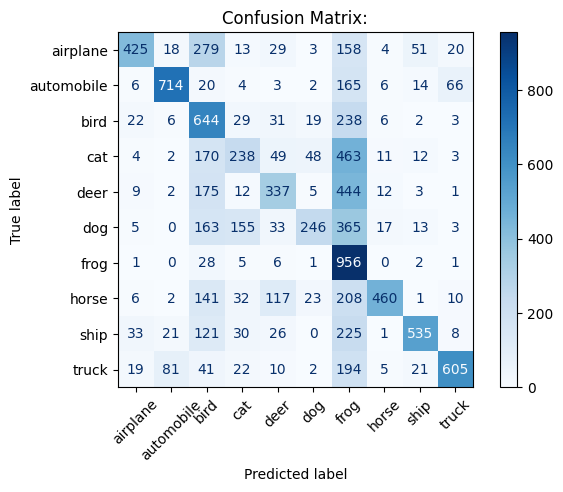

In [38]:
plt.figure(figsize=(12, 8))  # Adjust figure size
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)  # Rotate labels
plt.yticks(ticks=np.arange(10), labels=class_names)  # Ensure y-tick labels are consistent
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.title('Confusion Matrix:')
plt.show()


***Save the model***

In [39]:
cnn_model.save('cnn_cifar10.h5')

C:\Users\User\.conda\envs\my_env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


***Load and predict***

1/1 [==============================] - 0s 39ms/step


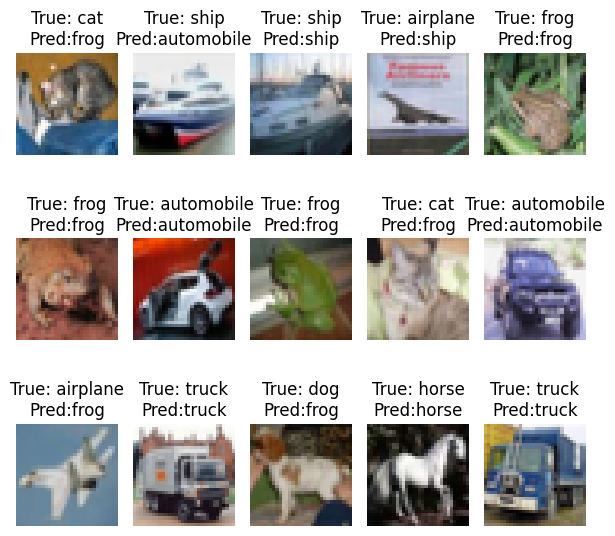

In [40]:
loaded_model = tf.keras.models.load_model('cnn_cifar10.h5')

sample_image = xtest[:15]
sample_label = ytest[:15]
predictions = np.argmax(cnn_model.predict(sample_image), axis=1)

plt.figure(figsize=(6,6))
for i in range(15):
    plt.subplot(3,5, i+1)
    plt.imshow(sample_image[i])
    plt.title(f"True: {class_names[sample_label[i]]}\nPred:{class_names[predictions[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()